In [1]:
import pandas as pd

data = "dfa-test.csv"
data = "dfa-test.log"

In [2]:
from datetime import datetime
from math import floor

def date2dow(row):
    date_str = row["date_only"]
    date = datetime.strptime(date_str, "%Y-%M-%d")
    return date.weekday()

def hm2min(row, bs=30):
    h_m = row["hour_min"].split(":")
    m = bs*floor(int(h_m[1])/bs)
    hour_min_r = ":".join([h_m[0],("%02d" % m)])
    return hour_min_r

In [3]:
df = pd.read_csv(data, names=["date","status"])
df.describe()

,date,status
count,17699,13388
unique,7077,60
top,"File ""/home/gustavo/.local/lib/python3.6/sit...",No live chat agents are available
freq,1795,5878


In [4]:
df = df.dropna()

df["hour"] = df.apply(lambda x: x.date.split(" ")[1].split(":")[0], axis=1)

df = df[df["hour"] != ""]

df["date_only"] = df.apply(lambda x: x.date.split(" ")[0], axis=1)

#Holidays
df = df[df["date_only"] != "2022-04-18"]


df = df[df["date_only"] <= "2022-04-31"]
df = df[df["date_only"] >= "2022-04-01"]

df = df[df["date_only"] != 'urllib3.exceptions.ProtocolError:']

df["hour_min"] = df.apply(lambda x: ":".join(x.date.split(" ")[1].split(":")[0:2]), axis=1)
df["status"] = df["status"].astype("category")
df["status_id"] = df["status"].cat.codes



df = df[df["status_id"] < 3]

In [5]:
df["dow"] = df.apply(date2dow, axis=1)
df["hour_min_r"] = df.apply(hm2min, axis=1)

onehot = pd.get_dummies(df.status)
df_full = pd.concat([df, onehot], axis=1)

In [6]:
df_full = df_full[df_full["hour_min"] < "16:30"]

In [55]:
df_full = df_full[df_full["status_id"] < 3]

In [56]:
df_full.describe()

,status_id,dow,Live chat is unavailable,No live chat agents are available,Start a chat
count,6153.000000,6153.000000,6153.000000,6153.000000,6153.000000
mean,1.017227,3.201365,0.038843,0.905087,0.056070
std,0.307623,1.341151,0.193236,0.293119,0.230076
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,1.000000,0.000000
50%,1.000000,3.000000,0.000000,1.000000,0.000000
75%,1.000000,4.000000,0.000000,1.000000,0.000000
max,2.000000,5.000000,1.000000,1.000000,1.000000


In [128]:
df_full_agg = df_full.iloc[:,8:11].agg(["count","sum"]).T
df_full_agg["per"] = df_full_agg.apply(lambda x: 100*x["sum"]/x["count"],axis=1)
df_full_agg

,count,sum,per
Live chat is unavailable,6153,239,3.884284
No live chat agents are available,6153,5569,90.508695
Start a chat,6153,345,5.607021


In [57]:
df_agg = df_full.iloc[:,3:11].groupby("date_only").agg(["count","sum"])
df_agg_hm = df_full.iloc[:,3:11].groupby("hour_min").agg(["count","sum"])
df_agg_hmr = df_full.iloc[:,3:11].groupby("hour_min_r").agg(["count","sum"])
df_agg_h = df_full.iloc[:,2:11].groupby("hour").agg(["count","sum"])
df_agg_dow = df_full.iloc[:,2:11].groupby("dow").agg(["count","sum"])
df_agg_hdow = df_full.iloc[:,2:11].groupby(["hour","dow"]).agg(["count","sum"])
df_agg_hrdow = df_full.iloc[:,2:11].groupby(["hour_min_r","dow"]).agg(["count","sum"])


In [119]:
df_agg.iloc[:,8:]

Live chat is unavailable      No live chat agents are available  \
                               count sum                              count   
date_only                                                                     
2022-04-06                       281  55                                281   
2022-04-07                       417  33                                417   
2022-04-08                       450  43                                450   
2022-04-11                       449  23                                449   
2022-04-12                       450  25                                450   
2022-04-13                       449  10                                449   
2022-04-14                       400   0                                400   
2022-04-19                       383   6                                383   
2022-04-20                       448   3                                448   
2022-04-21                       388  12                                388   
2022-04-22                       449   2                                449   
2022-04-25                       439  10                                439   
2022-04-26                       224   5                                224   
2022-04-27                       275   0                                275   
2022-04-28                       233  12                                233   
2022-04-29                       418   0                                418   

                   Start a chat                
              sum         count sum       per  
date_only                                      
2022-04-06  211.0           281  15  5.338078  
2022-04-07  361.0           417  23  5.515588  
2022-04-08  371.0           450  36  8.000000  
2022-04-11  402.0           449  24  5.345212  
2022-04-12  399.0           450  26  5.777778  
2022-04-13  413.0           449  26  5.790646  
2022-04-14  382.0           400  18  4.500000  
2022-04-19  354.0           383  23  6.005222  
2022-04-20  408.0           448  37  8.258929  
2022-04-21  347.0           388  29  7.474227  
2022-04-22  417.0           449  30  6.681514  
2022-04-25  414.0           439  15  3.416856  
2022-04-26  208.0           224  11  4.910714  
2022-04-27  263.0           275  12  4.363636  
2022-04-28  215.0           233   6  2.575107  
2022-04-29  404.0           418  14  3.349282

In [59]:
df_agg[(' Start a chat', "per")] = 100 * (df_agg[(' Start a chat', "sum")]/df_agg[(' Start a chat', "count")])
df_agg_hm[(' Start a chat', "per")] = 100 * (df_agg_hm[(' Start a chat', "sum")]/df_agg_hm[(' Start a chat', "count")])
df_agg_hmr[(' Start a chat', "per")] = 100 * (df_agg_hmr[(' Start a chat', "sum")]/df_agg_hmr[(' Start a chat', "count")])
df_agg_h[(' Start a chat', "per")] = 100 * (df_agg_h[(' Start a chat', "sum")]/df_agg_h[(' Start a chat', "count")])
df_agg_dow[(' Start a chat', "per")] = 100 * (df_agg_dow[(' Start a chat', "sum")]/df_agg_dow[(' Start a chat', "count")])
df_agg_hdow[(' Start a chat', "per")] = 100 * (df_agg_hdow[(' Start a chat', "sum")]/df_agg_hdow[(' Start a chat', "count")])
df_agg_hrdow[(' Start a chat', "per")] = 100 * (df_agg_hrdow[(' Start a chat', "sum")]/df_agg_hrdow[(' Start a chat', "count")])

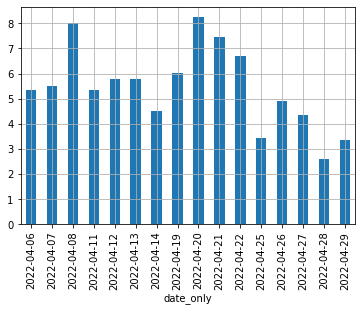

In [75]:
df_agg[(' Start a chat', "per")].plot.bar(grid=True)

In [61]:
df_agg_hm[(' Start a chat',)].sort_values("per",ascending=False)[0:16]

,count,sum,per
hour_min,,,
15:47,13,5,38.461538
12:51,14,5,35.714286
10:29,14,4,28.571429
16:02,14,4,28.571429
09:01,11,3,27.272727
09:02,11,3,27.272727
09:12,11,3,27.272727
15:09,12,3,25.000000
09:45,12,3,25.000000


In [62]:
df_agg_h[(' Start a chat',)].sort_values("per",ascending=False)

,count,sum,per
hour,,,
15,753,61,8.100930
16,420,33,7.857143
09,710,45,6.338028
12,900,53,5.888889
14,807,47,5.824040
11,899,40,4.449388
13,833,35,4.201681
10,831,31,3.730445


In [63]:
df_agg_dow[(' Start a chat',)].sort_values("per",ascending=False)

,count,sum,per
dow,,,
3,1453,90,6.194081
5,1317,80,6.074412
2,1057,60,5.676443
4,1438,76,5.285118
1,888,39,4.391892


In [131]:
df_per = df_agg_hrdow[(' Start a chat',)].sort_values("per",ascending=False)["per"]
df_per_r = df_agg_hrdow[(' Start a chat',)].sort_values("per",ascending=True)["per"]
df_per[0:10]

hour_min_r  dow
16:00       5      12.222222
15:30       4      11.666667
15:00       5      11.111111
09:00       3      10.169492
15:30       2      10.000000
09:00       1      10.000000
11:30       3       9.183673
14:30       4       8.955224
12:30       5       8.888889
15:00       2       8.333333
Name: per, dtype: float64

In [132]:
df_per_r[0:7]

hour_min_r  dow
11:00       1      0.000000
10:30       4      1.666667
13:00       2      1.666667
10:30       1      1.666667
13:00       1      1.694915
10:00       1      1.754386
10:30       2      2.222222
Name: per, dtype: float64

In [65]:
df1= df_per.unstack(1)
df1.style.background_gradient(cmap='Blues')

dow,1,2,3,4,5
hour_min_r,,,,,
09:00,10.000000,8.333333,10.169492,6.666667,5.633803
09:30,3.333333,6.666667,5.000000,3.000000,6.666667
10:00,1.754386,4.819277,8.333333,5.833333,3.333333
10:30,1.666667,2.222222,4.918033,1.666667,3.333333
11:00,0.000000,5.555556,2.247191,4.166667,3.370787
11:30,3.703704,5.555556,9.183673,3.333333,5.555556
12:00,3.333333,6.666667,3.703704,5.833333,6.666667
12:30,6.666667,5.405405,6.315789,5.309735,8.888889
13:00,1.694915,1.666667,6.666667,4.444444,4.444444


In [66]:
bs = 30
yticklabels = []

for t in df1.index:
    h = t.split(":")[0]
    m = t.split(":")[1]
    m = str( int(m) + bs -1)
    yticklabels.append(t + " - " + h + ":" + m)

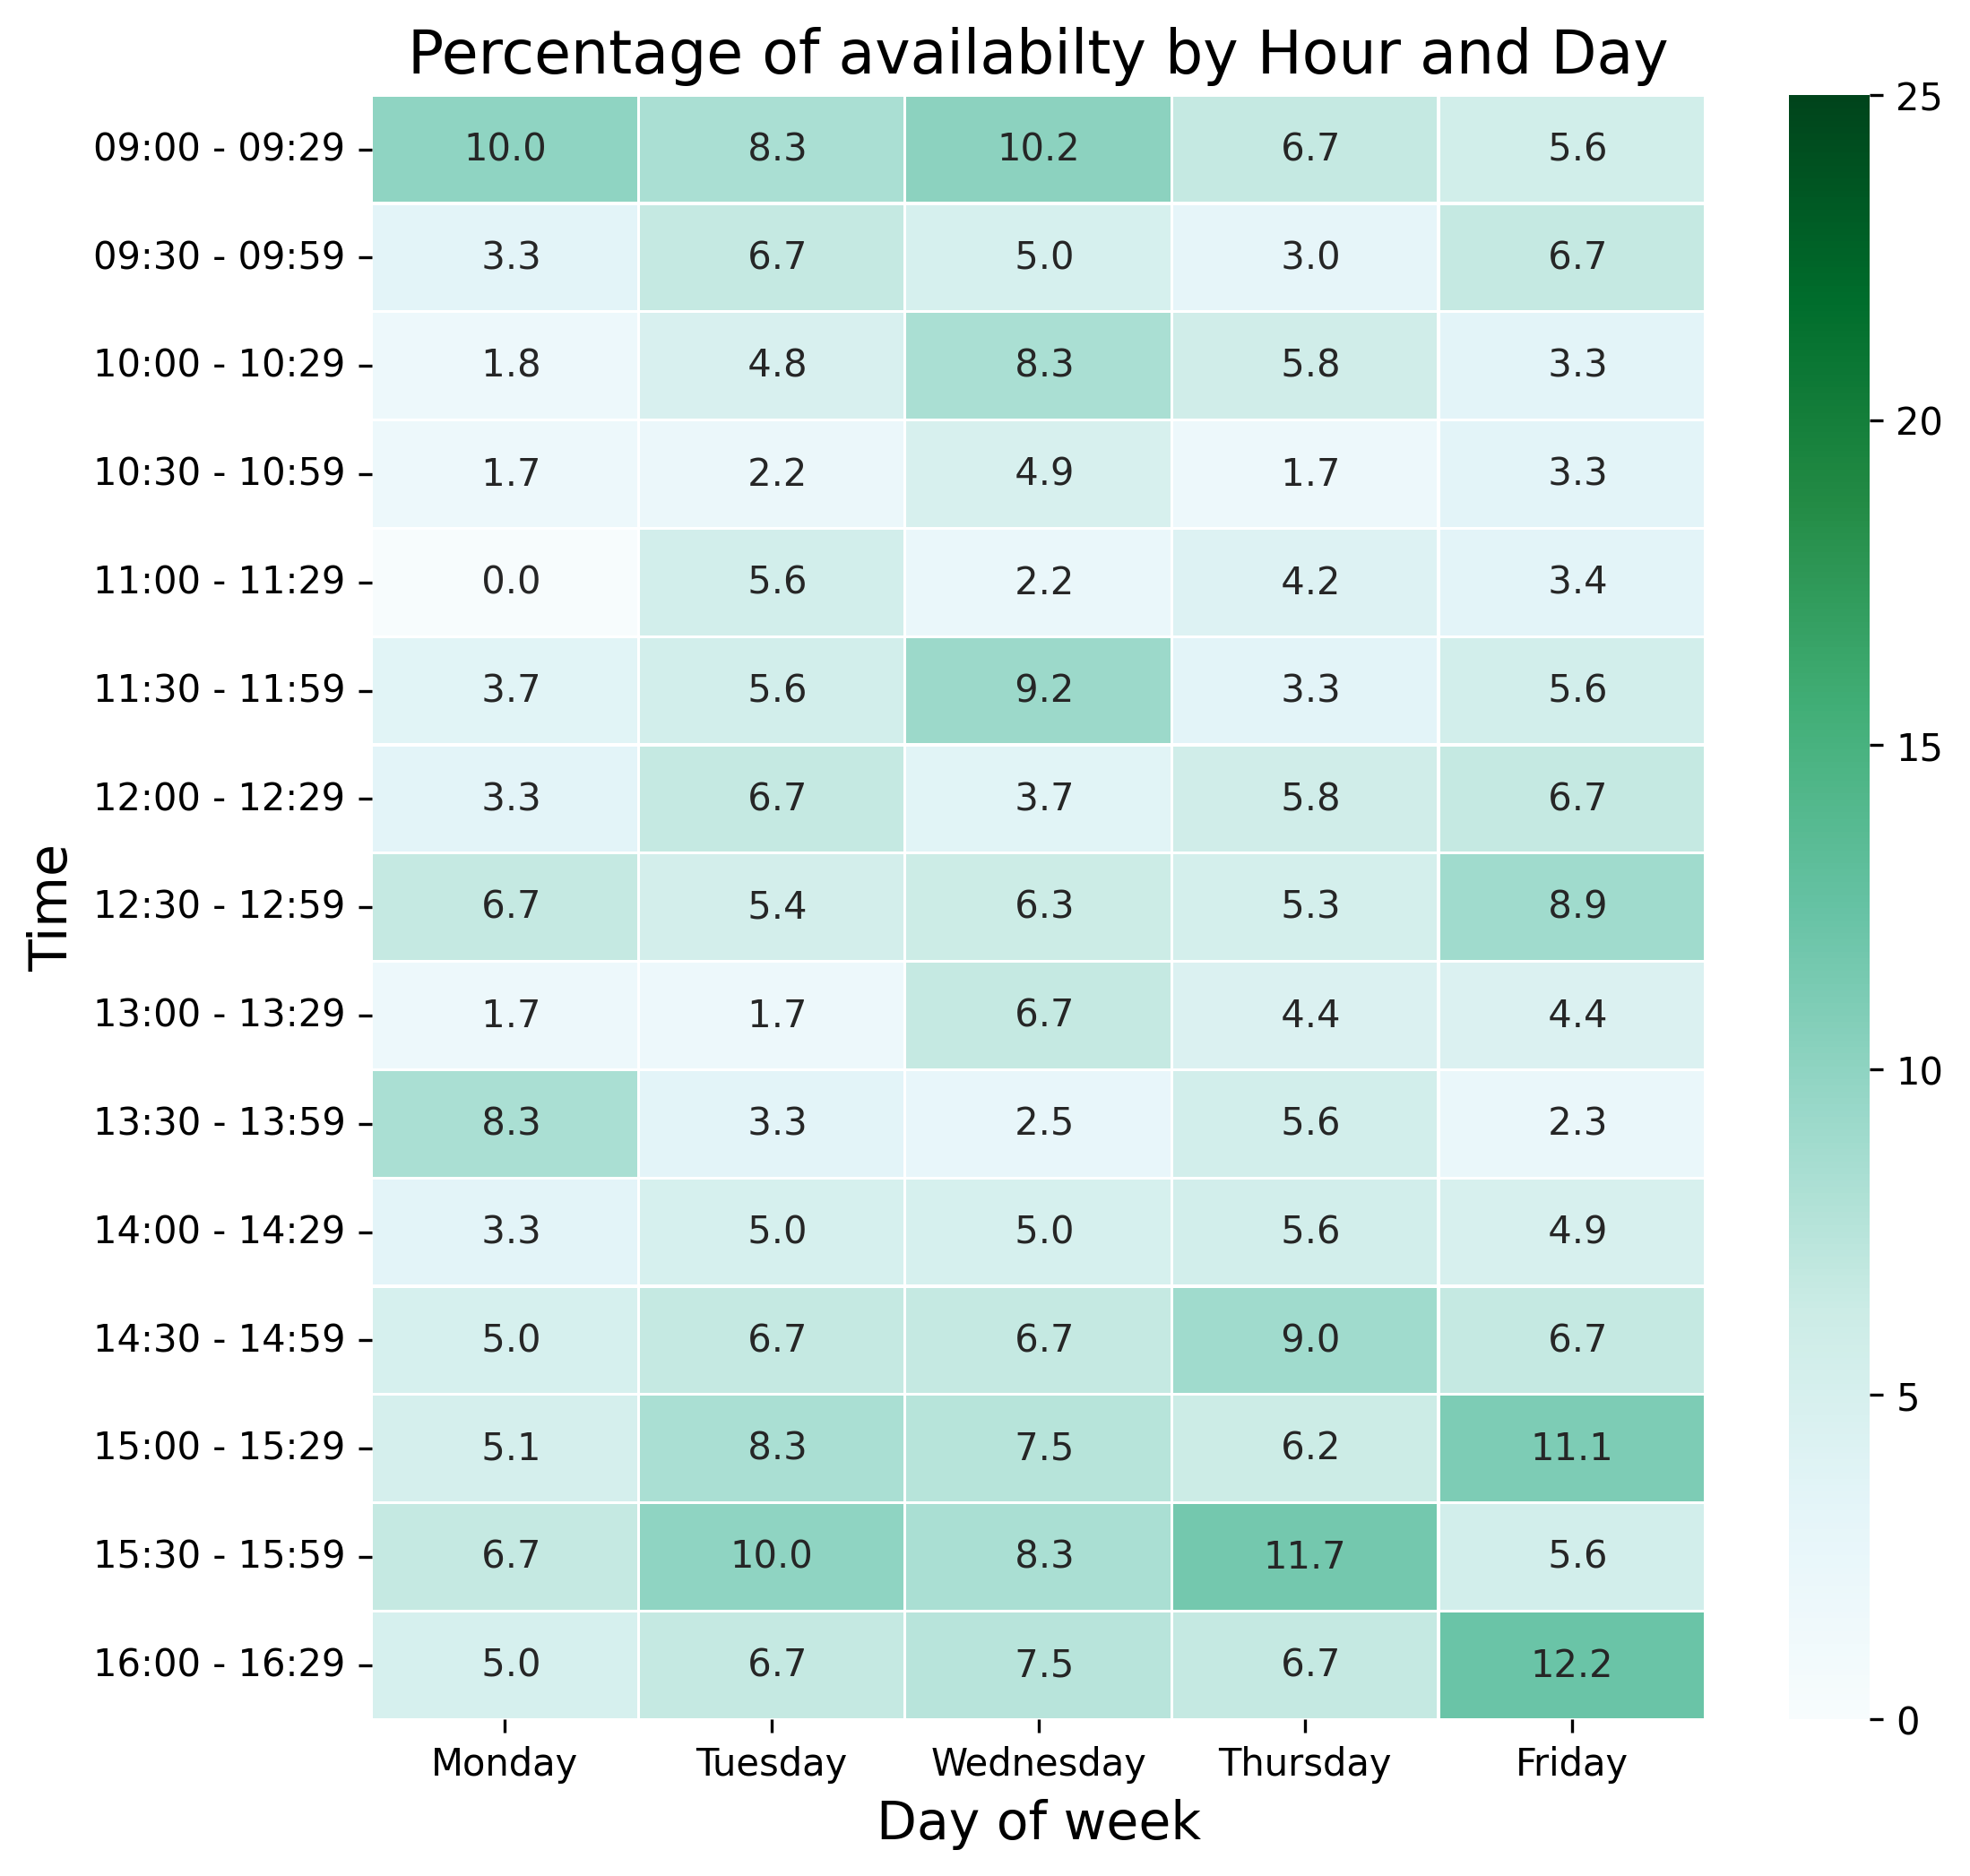

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

f = plt.figure(figsize=(8,8), dpi=300)
ax = plt.subplot()

sns.heatmap(df1,
            ax=ax,
            annot=True, linewidths=0.5,
            #square= True,
            vmin=0, vmax=25,
            cmap="BuGn",
            fmt="4.1f",
            xticklabels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"],
            yticklabels = yticklabels
           )
ax.set_xlabel("Day of week", fontsize=14)
ax.set_ylabel("Time", fontsize=14)
ax.set_title("Percentage of availabilty by Hour and Day", fontsize=16)
#f.suptitle("Passport service webchat availability in April 2022", fontsize=20)

f.savefig("April 2022 hour day.png",
          bbox_inches="tight",
          pad_inches=0.1)

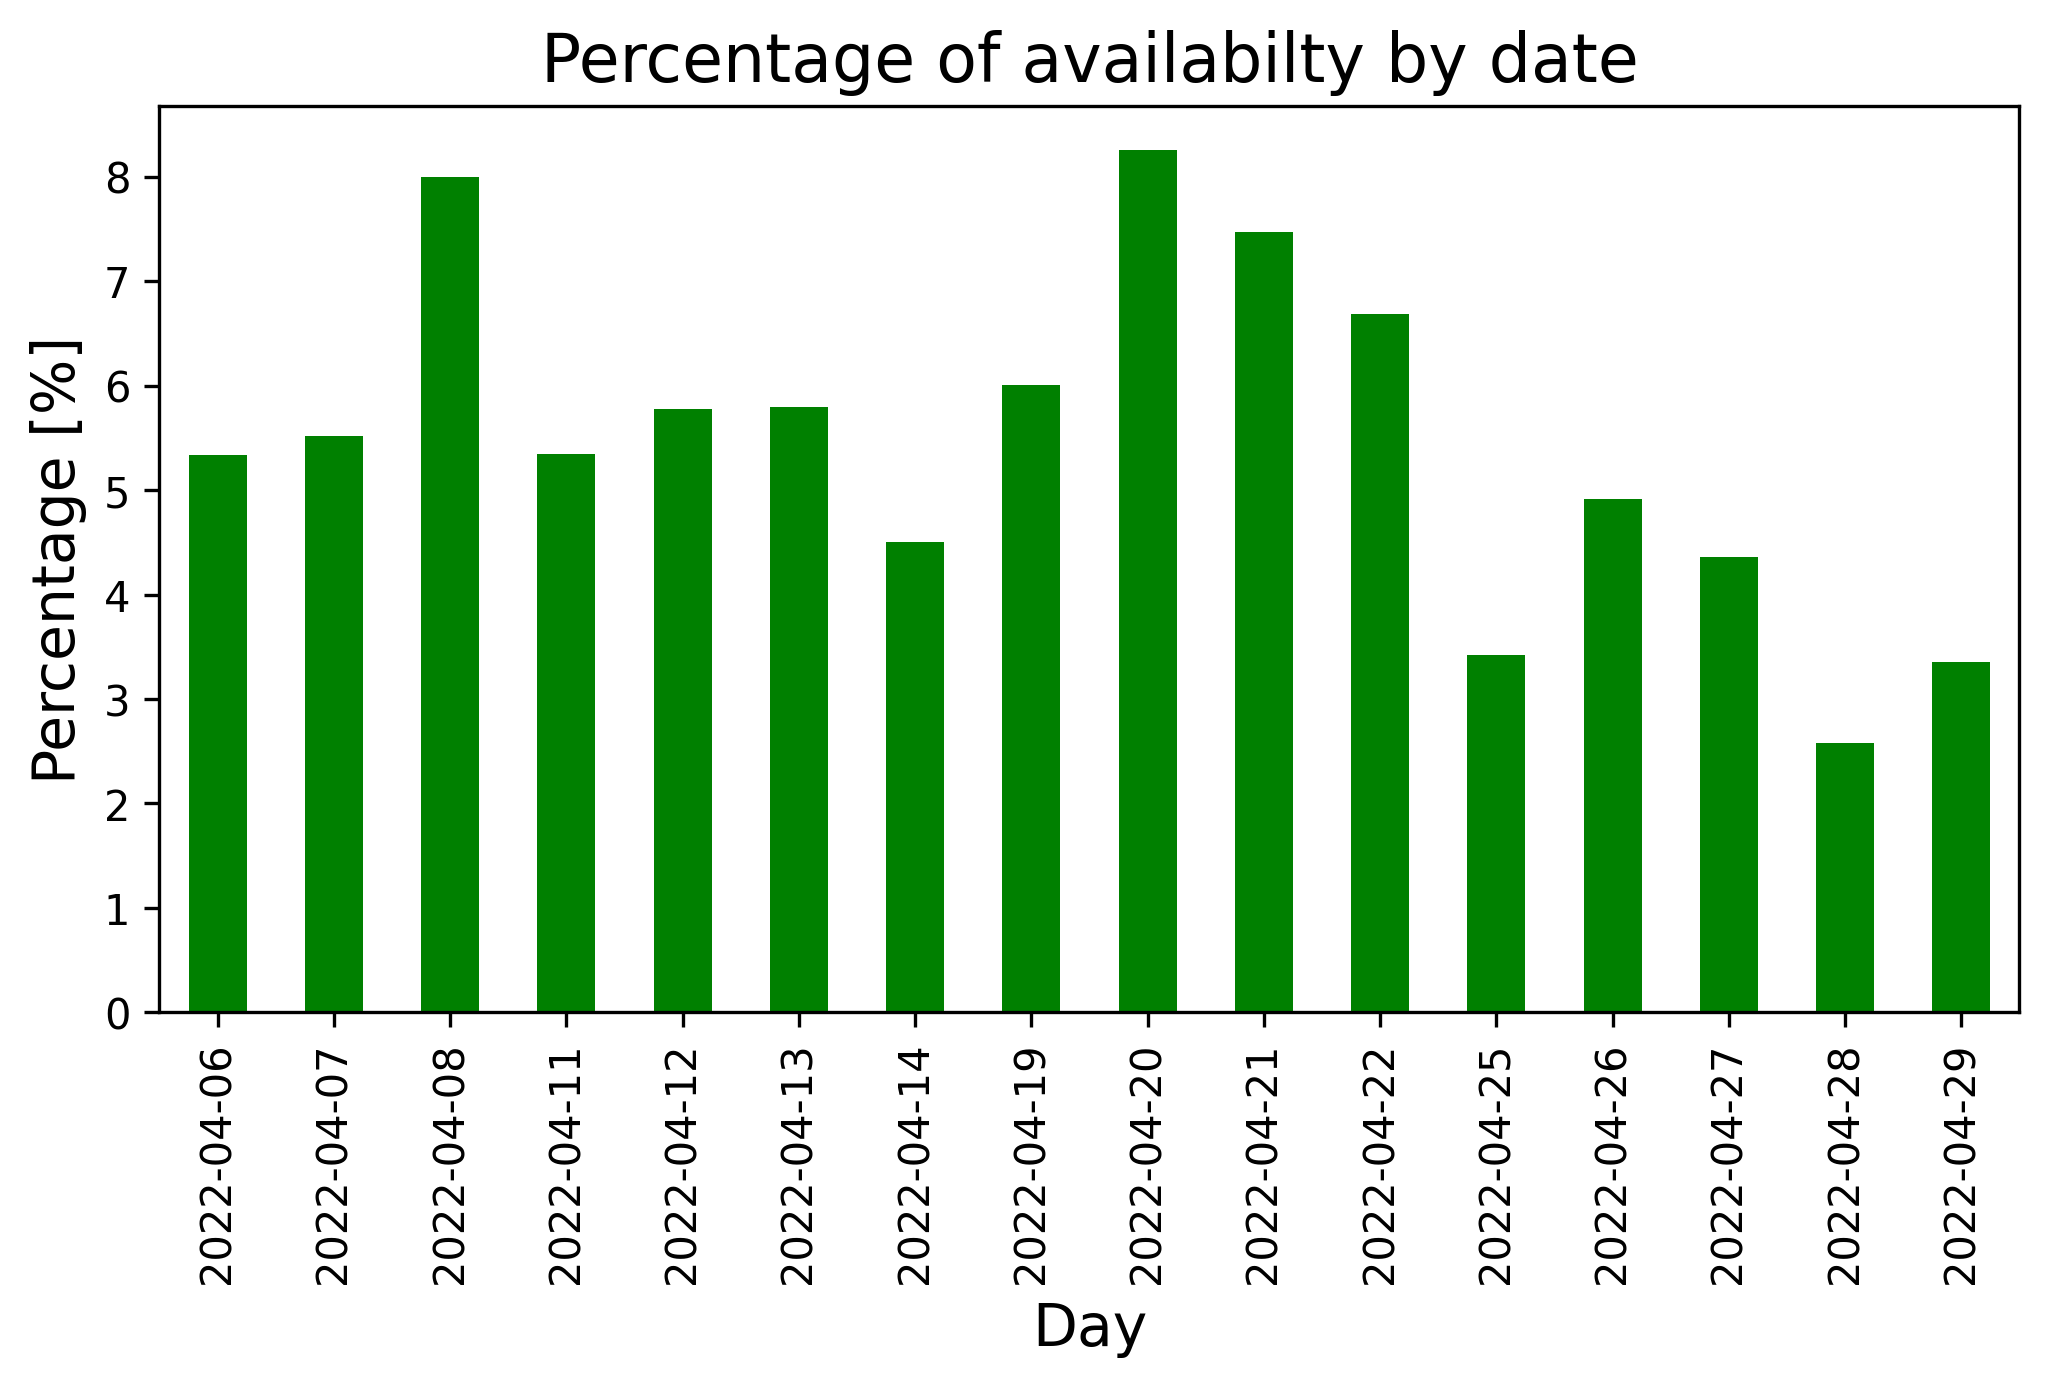

In [113]:
f = plt.figure(figsize=(8,4), dpi=300)
ax = plt.subplot()
df_agg[(' Start a chat', "per")].plot.bar(ax=ax, color="green")

ax.set_xlabel("Day", fontsize=14)
ax.set_ylabel("Percentage [%]", fontsize=14)
ax.set_title("Percentage of availabilty by date", fontsize=16)
#f.suptitle("Passport service webchat availability in April 2022", fontsize=20)

f.savefig("April 2022 date.png",
          bbox_inches="tight")

In [17]:
df_full[df_full["hour_min"] == "09:00"]

,date,status,hour,date_only,hour_min,status_id,dow,hour_min_r,Live chat is unavailable,No live chat agents are available,Start a chat
989,2022-04-07 09:00:02,Live chat is unavailable,09,2022-04-07,09:00,0,4,09:00,1,0,0
1837,2022-04-08 09:00:01,Live chat is unavailable,09,2022-04-08,09:00,0,5,09:00,1,0,0
2317,2022-04-11 09:00:01,Live chat is unavailable,09,2022-04-11,09:00,0,1,09:00,1,0,0
2800,2022-04-12 09:00:01,Live chat is unavailable,09,2022-04-12,09:00,0,2,09:00,1,0,0
3280,2022-04-13 09:00:01,Live chat is unavailable,09,2022-04-13,09:00,0,3,09:00,1,0,0
4775,2022-04-20 09:00:01,Live chat is unavailable,09,2022-04-20,09:00,0,3,09:00,1,0,0
5268,2022-04-21 09:00:02,Start a chat,09,2022-04-21,09:00,2,4,09:00,0,0,1
5686,2022-04-22 09:00:02,Live chat is unavailable,09,2022-04-22,09:00,0,5,09:00,1,0,0
6169,2022-04-25 09:00:01,Live chat is unavailable,09,2022-04-25,09:00,0,1,09:00,1,0,0
6731,2022-04-26 09:00:01,Live chat is unavailable,09,2022-04-26,09:00,0,2,09:00,1,0,0


In [18]:
df_full.date_only.unique()

array(['2022-04-06', '2022-04-07', '2022-04-08', '2022-04-11',
       '2022-04-12', '2022-04-13', '2022-04-14', '2022-04-19',
       '2022-04-20', '2022-04-21', '2022-04-22', '2022-04-25',
       '2022-04-26', '2022-04-27', '2022-04-28', '2022-04-29'],
      dtype=object)